## 📊 Dataset Introduction
##### This dataset contains transactional and demographic records for credit card customers, designed to support financial analytics and customer behavior modeling. It includes key variables such as:

- Client Identifiers (`Client_Num`)
- Demographics: `Gender`,` Education_Level`, `Marital_Status`, `Customer_Job`, `state_cd`
- Financial Metrics: `Income`, `Credit_Limit`, `Interest_Earned`, `Total_Trans_Amt`, `Delinquent_Acc`
- Categorical Variables: `Card_Category`, `Use_Chip`, `Cust_Satisfaction_Score`, `Exp_Type`
- Temporal Dimension: `Month`

##### The dataset supports various forms of analysis, including:

- Customer segmentation
- Income distribution analysis
- Credit risk profiling
- Time-series transaction trends
- Behavioral patterns by card type or region

In [1]:
# Import libraries 
import os
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
#Get working directory
current_dir = os.getcwd()
#go one directory up to root directory
project_root_dir = os.path.dirname(current_dir)
#Define path to data files
data_dir = os.path.join(project_root_dir, 'data')
raw_dir = os.path.join(data_dir, 'raw')
processed_dir = os.path.join(data_dir, 'processed')
#Define path to results folder
results_dir = os.path.join(project_root_dir, 'results')
#Define path to results folder
docs_dir = os.path.join(project_root_dir, 'docs')

#Create directories if they do not exist
os.makedirs(raw_dir, exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)
os.makedirs(docs_dir, exist_ok=True)

###  Read in Data

In [5]:
merged_data_filename = os.path.join(processed_dir, "Credit_Card_Financial.csv")
merged_df = pd.read_csv(merged_data_filename)
merged_df.head(10)

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,...,Education_Level,Marital_Status,state_cd,Car_Owner,House_Owner,Personal_loan,Customer_Job,Income,Cust_Satisfaction_Score,Month
0,708082083,blue,200,0,87,2023-01-01,week-1,q1,2023,3544.0,...,uneducated,single,Florida,no,yes,no,businessman,202326,3,January
1,708083283,blue,445,1,108,2023-01-01,week-1,q1,2023,3421.0,...,unknown,married,New Jersey,no,no,no,selfemployeed,5225,2,January
2,708084558,blue,140,0,106,2023-01-01,week-1,q1,2023,8258.0,...,unknown,married,New Jersey,yes,no,no,selfemployeed,14235,2,January
3,708085458,blue,250,1,150,2023-01-01,week-1,q1,2023,1438.3,...,uneducated,single,New York,no,no,no,blue-collar,45683,1,January
4,708086958,blue,320,1,106,2023-01-01,week-1,q1,2023,3128.0,...,graduate,single,Texas,yes,yes,no,businessman,59279,1,January
5,708095133,blue,100,0,94,2023-01-01,week-1,q1,2023,33304.0,...,high school,single,New York,no,yes,no,selfemployeed,14254,3,January
6,708098133,blue,225,1,75,2023-01-01,week-1,q1,2023,2834.0,...,graduate,single,California,yes,no,no,selfemployeed,14975,2,January
7,708099183,blue,400,1,75,2023-01-01,week-1,q1,2023,5723.0,...,uneducated,single,California,no,no,no,retirees,31982,2,January
8,708100533,blue,200,1,64,2023-01-01,week-1,q1,2023,2679.0,...,high school,married,New Jersey,yes,no,no,businessman,86668,2,January
9,708103608,platinum,95,1,80,2023-01-01,week-1,q1,2023,11898.0,...,graduate,married,New Jersey,yes,yes,no,businessman,223196,1,January


In [7]:
merged_df.columns

Index(['Client_Num', 'Card_Category', 'Annual_Fees', 'Activation_30_Days',
       'Customer_Acq_Cost', 'Week_Start_Date', 'Week_Num', 'Qtr',
       'current_year', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Amt', 'Total_Trans_Vol', 'Avg_Utilization_Ratio',
       'Use Chip', 'Exp Type', 'Interest_Earned', 'Delinquent_Acc',
       'Customer_Age', 'Gender', 'Dependent_Count', 'Education_Level',
       'Marital_Status', 'state_cd', 'Car_Owner', 'House_Owner',
       'Personal_loan', 'Customer_Job', 'Income', 'Cust_Satisfaction_Score',
       'Month'],
      dtype='object')

In [9]:
merged_df.shape

(10108, 31)

In [11]:
merged_df.info

<bound method DataFrame.info of        Client_Num Card_Category  Annual_Fees  Activation_30_Days  \
0       708082083          blue          200                   0   
1       708083283          blue          445                   1   
2       708084558          blue          140                   0   
3       708085458          blue          250                   1   
4       708086958          blue          320                   1   
...           ...           ...          ...                 ...   
10103   827695683          blue          340                   1   
10104   827703258          blue          395                   1   
10105   827712108          blue          125                   1   
10106   827888433          blue          410                   0   
10107   827890758          blue          100                   0   

       Customer_Acq_Cost Week_Start_Date Week_Num Qtr  current_year  \
0                     87      2023-01-01   week-1  q1          2023   
1        

### Numerical variables

In [13]:
merged_df.describe(include='object')

,Card_Category,Week_Start_Date,Week_Num,Qtr,Use Chip,Exp Type,Customer_Age,Gender,Education_Level,Marital_Status,state_cd,Car_Owner,House_Owner,Personal_loan,Customer_Job,Month
count,10108,10108,10108,10108,10108,10108,10108,10108,10108,10108,10108,10108,10108,10108,10108,10108
unique,4,52,52,4,3,6,6,2,6,3,28,2,2,2,6,12
top,blue,2023-07-02,week-27,q2,swipe,bills,46-55,Female,graduate,married,California,no,no,no,selfemployeed,April
freq,9214,195,195,2535,7101,2970,4104,5880,4134,5128,2468,6044,5390,8822,2575,975


In [15]:
merged_df['Gender'].value_counts(normalize=True)

Gender
Female    0.581717
Male      0.418283
Name: proportion, dtype: float64

In [17]:
merged_df['Card_Category'].value_counts(normalize=True)

Card_Category
blue        0.911555
silver      0.063217
gold        0.018599
platinum    0.006628
Name: proportion, dtype: float64

In [19]:
merged_df['Marital_Status'].value_counts(normalize=True)

Marital_Status
married    0.507321
single     0.419074
unknown    0.073605
Name: proportion, dtype: float64

###  Insights and Visuals

In [21]:
average_income = merged_df["Income"].mean()
print("Average Income:", round(average_income, 2))

Average Income: 56976.1


In [23]:
total_customers = merged_df["Client_Num"].nunique()
print("Total Customers:", total_customers)

Total Customers: 10108


In [25]:
avg_credit_limit = merged_df["Credit_Limit"].mean()
print("Average Credit Limit:", round(avg_credit_limit, 2))

Average Credit Limit: 8635.64


In [27]:
avg_score = merged_df["Cust_Satisfaction_Score"].mean()
print("Average Satisfaction Score:", round(avg_score, 2))

Average Satisfaction Score: 3.19


### `Gender` Distribution

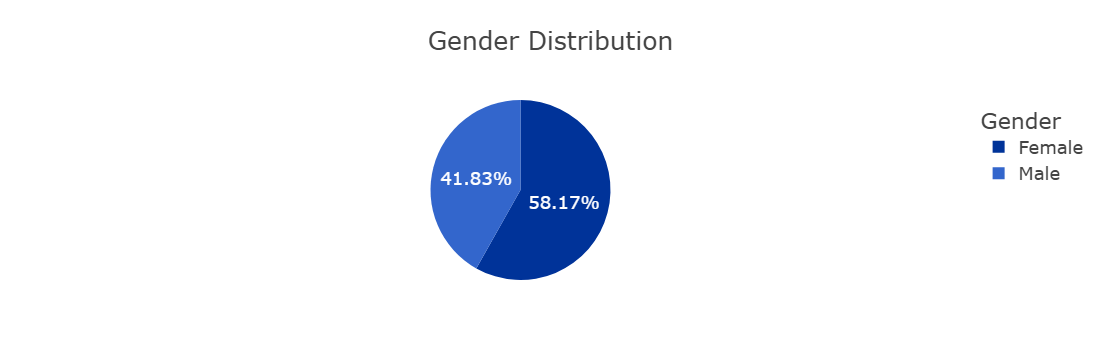

In [33]:
gender_dist = merged_df['Gender'].value_counts().reset_index()
gender_dist.columns = ['Gender', 'count']

fig = px.pie(gender_dist, names='Gender', values='count', title="Gender Distribution",
             color_discrete_sequence=["#003399 ", "#3366cc ", "#dbe4f0 "])

fig.update_layout(
    template = "presentation",
    legend_title = dict(text="Gender"),
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)"
)

fig.update_traces(texttemplate="%{percent:.2%}", textposition="inside")

fig.show()

fig.write_image(os.path.join(results_dir, 'Gender_Distribution_Pie_Chart.jpg'))
fig.write_image(os.path.join(results_dir, 'Gender_Distribution_Pie_Chart.png'))
fig.write_html(os.path.join(results_dir, 'Gender_Distribution_Pie_Chart.html'))

### Income by `Education Level`

In [35]:
merged_df_income_edlevel = merged_df.groupby('Education_Level')['Income'].mean().reset_index(name='average_income').sort_values(by='average_income', ascending=False)
merged_df_income_edlevel

,Education_Level,average_income
5,unknown,58040.557096
2,high school,57771.664510
4,uneducated,57364.834794
3,post-graduate,56640.678295
1,graduate,56254.135462
0,doctorate,55579.789357


In [37]:
total_income = merged_df_income_edlevel['average_income'].sum()
merged_df_income_edlevel['percentage'] = (merged_df_income_edlevel['average_income'] / total_income) * 100
merged_df_income_edlevel = merged_df_income_edlevel.sort_values(by='average_income', ascending=False)
merged_df_income_edlevel

,Education_Level,average_income,percentage
5,unknown,58040.557096,16.988226
2,high school,57771.664510,16.909523
4,uneducated,57364.834794,16.790445
3,post-graduate,56640.678295,16.578488
1,graduate,56254.135462,16.465348
0,doctorate,55579.789357,16.267970


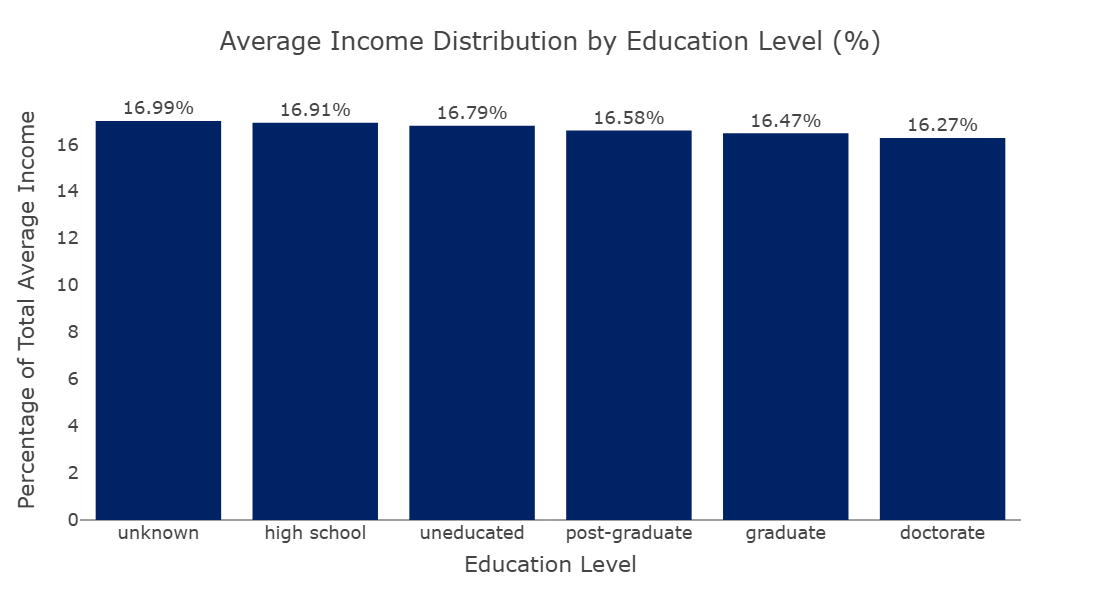

In [39]:
fig = px.bar(
    merged_df_income_edlevel,
    x='Education_Level',
    y='percentage',
    title='Average Income Distribution by Education Level (%)',
    barmode='group',
    height=600,
    width=1000,
    color_discrete_sequence=['#002366'], 
    text='percentage'
)

fig.update_layout(
    template="presentation",
    xaxis_title="Education Level",
    yaxis_title="Percentage of Total Average Income",
    legend_title_text=None,
    paper_bgcolor = "rgba(0, 0, 0, 0)",
    plot_bgcolor = "rgba(0, 0, 0, 0)",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.update_traces(
    texttemplate="%{text:.2f}%",
    textposition="outside",
    marker_line_width=0  
)

fig.write_image(os.path.join(results_dir, 'Avg_Income_by_EdLevel.jpg'))
fig.write_image(os.path.join(results_dir, 'Avg_Income_by_EdLevel.png'))
fig.write_html(os.path.join(results_dir, 'Avg_Income_by_EdLevel.html'))

fig.show()

### `Customers` by `Marital Status`

In [44]:
marital_status_df = merged_df['Marital_Status'].value_counts().reset_index()
marital_status_df.columns = ['Marital_Status', 'total_customers']
marital_status_df = marital_status_df.sort_values(by='total_customers', ascending=False)
marital_status_df

,Marital_Status,total_customers
0,married,5128
1,single,4236
2,unknown,744


In [46]:
total = marital_status_df['total_customers'].sum()
marital_status_df['percentage'] = (marital_status_df['total_customers'] / total) * 100
marital_status_df

,Marital_Status,total_customers,percentage
0,married,5128,50.732093
1,single,4236,41.907400
2,unknown,744,7.360507


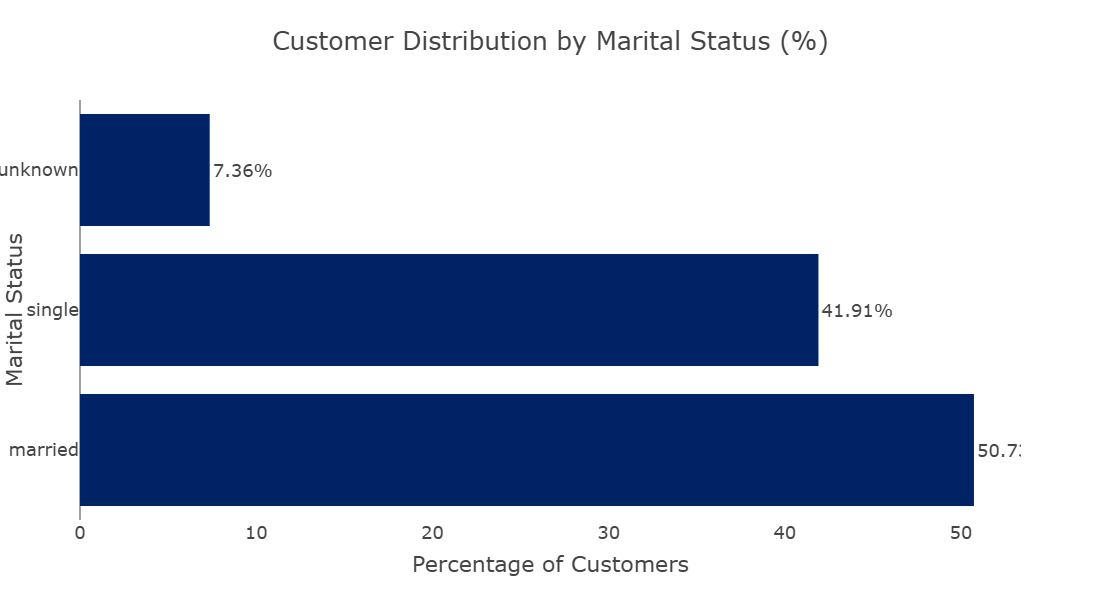

In [58]:
fig = px.bar(
    marital_status_df,
    y='Marital_Status',
    x='percentage',
    orientation='h',
    title='Customer Distribution by Marital Status (%)',
    color_discrete_sequence=['#002366'],
    text = 'percentage',
    height=600,
    width=900
)

fig.update_layout(
    template = "presentation",
    xaxis_title="Percentage of Customers",
    yaxis_title="Marital Status",
    legend_title_text=None,
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.update_traces(
    texttemplate="%{text:.2f}%",
    textposition="outside",
    marker_line_width=0
)

fig.write_image(os.path.join(results_dir, 'Customers_by_Marital_Status.jpg'))
fig.write_image(os.path.join(results_dir, 'Customers_by_Marital_Status.png'))
fig.write_html(os.path.join(results_dir, 'Customers_by_Marital_Status.html'))

fig.show()

### Average `Credit Limit` by `Card Type`

In [64]:
avg_credit_by_card = merged_df.groupby('Card_Category')['Credit_Limit'].mean().reset_index(name='average_credit_limit')
avg_credit_by_card = avg_credit_by_card.sort_values(by='average_credit_limit', ascending=False)
avg_credit_by_card

,Card_Category,average_credit_limit
3,silver,23391.641628
1,gold,21857.835106
2,platinum,16455.134328
0,blue,7285.657858


In [66]:
total_credit = avg_credit_by_card['average_credit_limit'].sum()
avg_credit_by_card['percentage'] = (avg_credit_by_card['average_credit_limit'] / total_credit) * 100
avg_credit_by_card

,Card_Category,average_credit_limit,percentage
3,silver,23391.641628,33.905712
1,gold,21857.835106,31.682490
2,platinum,16455.134328,23.851385
0,blue,7285.657858,10.560414


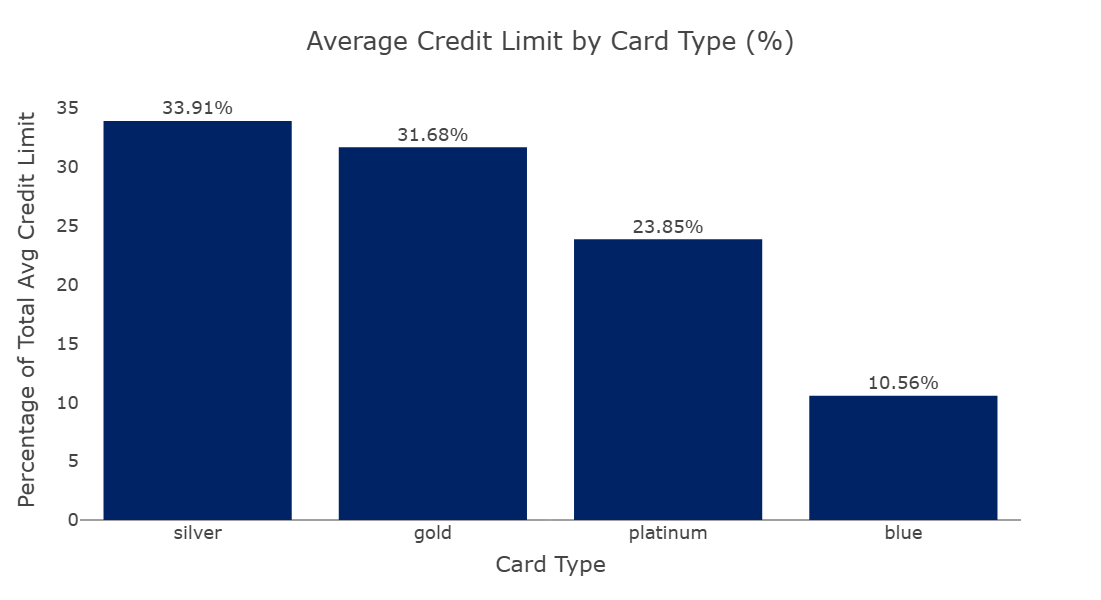

In [68]:
fig = px.bar(
    avg_credit_by_card,
    x='Card_Category',
    y='percentage',
    title='Average Credit Limit by Card Type (%)',
    color_discrete_sequence=['#002366'],
    text='percentage',
    height=600,
    width=1000
)

fig.update_layout(
    template="presentation",
    xaxis_title="Card Type",
    yaxis_title="Percentage of Total Avg Credit Limit",
    legend_title_text=None,
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.update_traces(
    texttemplate="%{text:.2f}%",
    textposition="outside",
    marker_line_width=0
)

fig.write_image(os.path.join(results_dir, 'Avg_Credit_Limit_by_Card_Type.jpg'))
fig.write_image(os.path.join(results_dir, 'Avg_Credit_Limit_by_Card_Type.png'))
fig.write_html(os.path.join(results_dir, 'Avg_Credit_Limit_by_Card_Type.html'))

fig.show()

### Average `Interest Earned` per `Card Type`

In [73]:
avg_interest_by_card = merged_df.groupby('Card_Category')['Interest_Earned'].mean().reset_index(name='average_interest')
avg_interest_by_card = avg_interest_by_card.sort_values(by='average_interest', ascending=False)
avg_interest_by_card

,Card_Category,average_interest
2,platinum,2412.373881
1,gold,1988.213617
3,silver,1270.862723
0,blue,705.001925


In [75]:
total_interest = avg_interest_by_card['average_interest'].sum()
avg_interest_by_card['percentage'] = (avg_interest_by_card['average_interest'] / total_interest) * 100
avg_interest_by_card

,Card_Category,average_interest,percentage
2,platinum,2412.373881,37.832541
1,gold,1988.213617,31.180562
3,silver,1270.862723,19.930562
0,blue,705.001925,11.056335


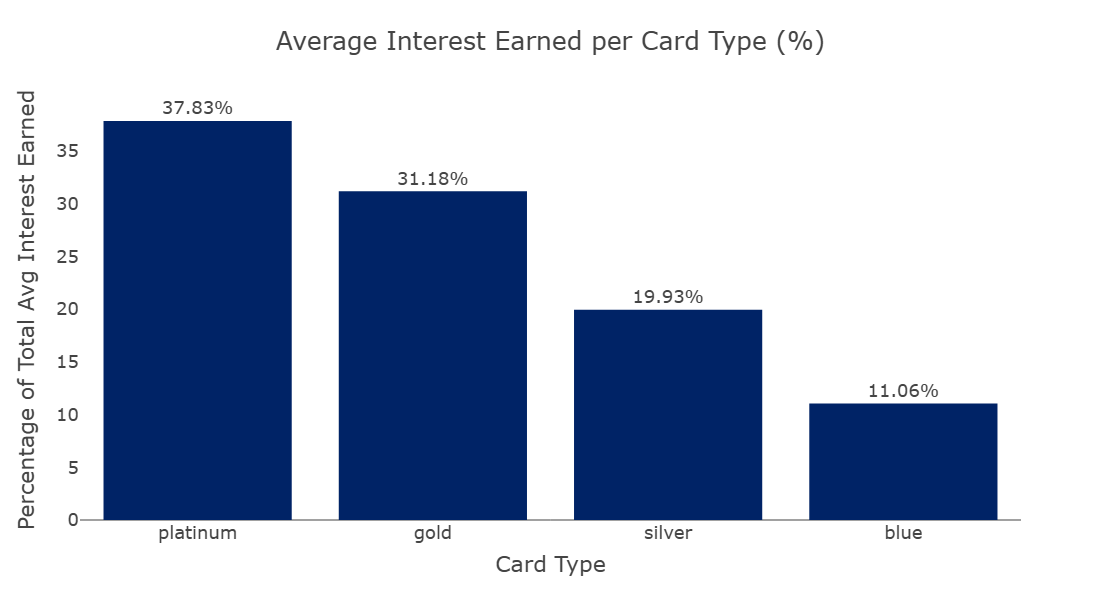

In [77]:
fig = px.bar(
    avg_interest_by_card,
    x='Card_Category',
    y='percentage',
    title='Average Interest Earned per Card Type (%)',
    color_discrete_sequence=['#002366'],
    text='percentage',
    height=600,
    width=1000
)

fig.update_layout(
    template="presentation",
    xaxis_title="Card Type",
    yaxis_title="Percentage of Total Avg Interest Earned",
    legend_title_text=None,
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.update_traces(
    texttemplate="%{text:.2f}%",
    textposition="outside",
    marker_line_width=0
)

fig.write_image(os.path.join(results_dir, 'Avg_Interest_by_Card_Type.jpg'))
fig.write_image(os.path.join(results_dir, 'Avg_Interest_by_Card_Type.png'))
fig.write_html(os.path.join(results_dir, 'Avg_Interest_by_Card_Type.html'))

fig.show()

### Usage Mode vs Total Spend

In [80]:
usage_vs_spend = merged_df.groupby('Use Chip')['Total_Trans_Amt'].sum().reset_index(name='total_spend')
usage_vs_spend = usage_vs_spend.sort_values(by='total_spend', ascending=True)
usage_vs_spend

,Use Chip,total_spend
1,online,2776610
0,chip,13850621
2,swipe,27894782


In [82]:
total_spend_sum = usage_vs_spend['total_spend'].sum()
usage_vs_spend['percentage'] = (usage_vs_spend['total_spend'] / total_spend_sum) * 100
usage_vs_spend

,Use Chip,total_spend,percentage
1,online,2776610,6.236488
0,chip,13850621,31.109602
2,swipe,27894782,62.653910


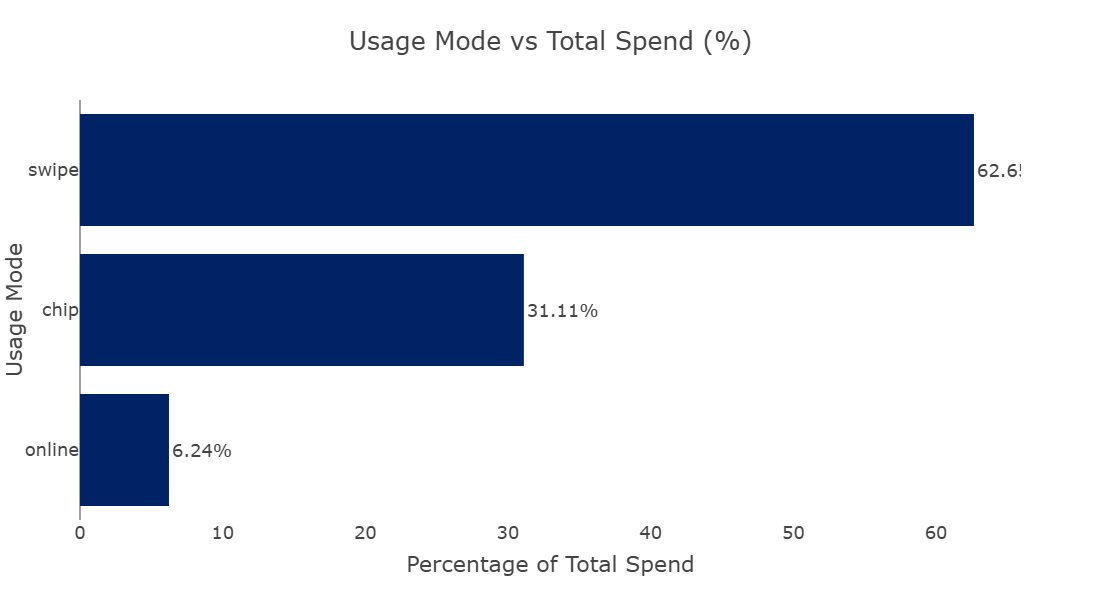

In [84]:
fig = px.bar(
    usage_vs_spend,
    x='percentage',
    y='Use Chip',
    orientation='h',
    title='Usage Mode vs Total Spend (%)',
    color_discrete_sequence=['#002366'],
    text='percentage',
    height=600,
    width=1000
)

fig.update_layout(
    template="presentation",
    xaxis_title="Percentage of Total Spend",
    yaxis_title="Usage Mode",
    legend_title_text=None,
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.update_traces(
    texttemplate="%{text:.2f}%",
    textposition="outside",
    marker_line_width=0
)

fig.write_image(os.path.join(results_dir, 'Usage_Mode_vs_Total_Spend.jpg'))
fig.write_image(os.path.join(results_dir, 'Usage_Mode_vs_Total_Spend.png'))
fig.write_html(os.path.join(results_dir, 'Usage_Mode_vs_Total_Spend.html'))

fig.show()

### Total Transaction Amount Over Time

In [87]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
merged_df['Month'] = pd.Categorical(merged_df['Month'], categories=month_order, ordered=True)

In [89]:
monthly_trans_amt = merged_df.groupby('Month')['Total_Trans_Amt'].sum().reset_index(name='total_transaction_amount')
monthly_trans_amt = monthly_trans_amt.sort_values('Month')
monthly_trans_amt

C:\Users\user\AppData\Local\Temp\ipykernel_15136\1145090672.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Month,total_transaction_amount
0,January,4322186
1,February,3539575
2,March,3388827
3,April,4174728
4,May,3426913
5,June,3533660
6,July,4546958
7,August,3449868
8,September,3452874
9,October,4050909


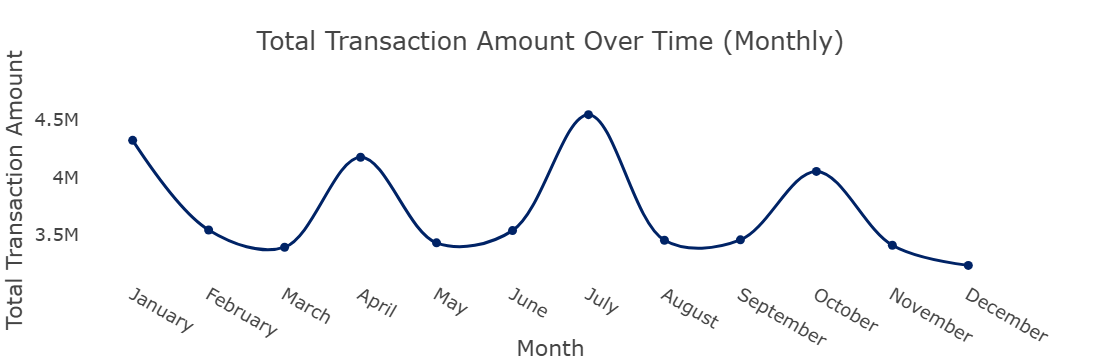

In [91]:
fig = px.line(
    monthly_trans_amt,
    x='Month',
    y='total_transaction_amount',
    title='Total Transaction Amount Over Time (Monthly)',
    markers=True
)

# Apply smoothing using a spline
fig.update_traces(line_shape='spline', line=dict(color='#002366', width=3))

fig.update_layout(
    template="presentation",
    xaxis_title="Month",
    yaxis_title="Total Transaction Amount",
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.write_image(os.path.join(results_dir, 'Total_Transaction_Amount_Over_Time.jpg'))
fig.write_image(os.path.join(results_dir, 'Total_Transaction_Amount_Over_Time.png'))
fig.write_html(os.path.join(results_dir, 'Total_Transaction_Amount_Over_Time.html'))

fig.show()

### Spending by Expense Type 

In [94]:
exp_type_spending = merged_df.groupby('Exp Type')['Client_Num'].nunique().reset_index(name='total_customers')
exp_type_spending = exp_type_spending.sort_values(by='total_customers', ascending=False)
exp_type_spending

,Exp Type,total_customers
0,bills,2970
1,entertainment,1988
3,fuel,1759
4,grocery,1502
2,food,1187
5,travel,702


In [96]:
total_customers = exp_type_spending['total_customers'].sum()
exp_type_spending['percentage'] = (exp_type_spending['total_customers'] / total_customers) * 100
exp_type_spending

,Exp Type,total_customers,percentage
0,bills,2970,29.382667
1,entertainment,1988,19.667590
3,fuel,1759,17.402058
4,grocery,1502,14.859517
2,food,1187,11.743174
5,travel,702,6.944994


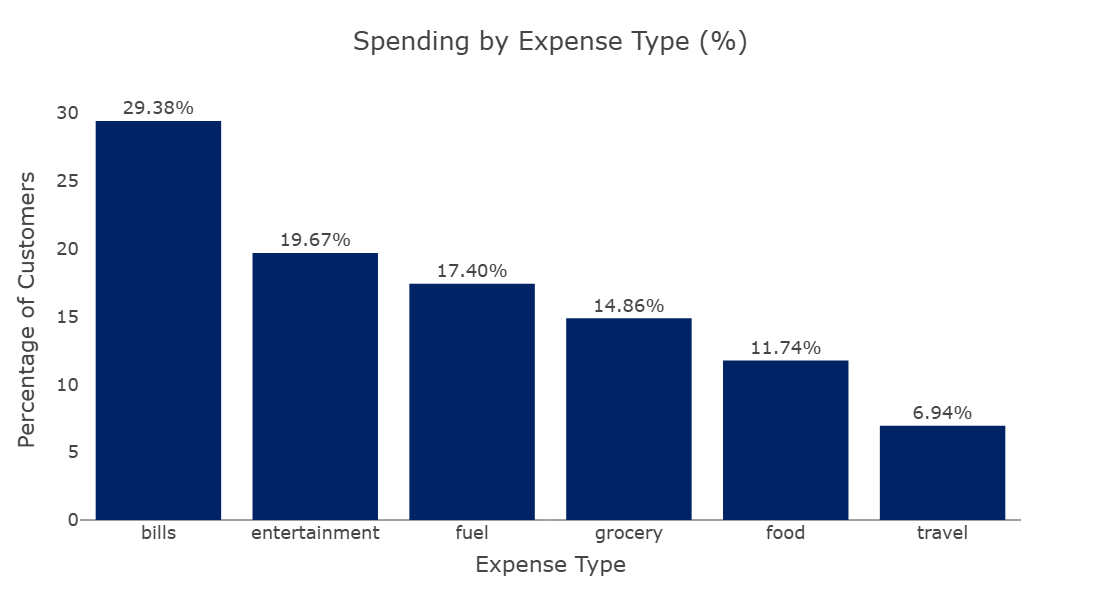

In [98]:
fig = px.bar(
    exp_type_spending,
    x='Exp Type',
    y='percentage',
    title='Spending by Expense Type (%)',
    text='percentage',
    color_discrete_sequence=['#002366'],
    height=600,
    width=1000
)

fig.update_layout(
    template="presentation",
    xaxis_title="Expense Type",
    yaxis_title="Percentage of Customers",
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.update_traces(
    texttemplate="%{text:.2f}%",
    textposition="outside",
    marker_line_width=0
)

fig.write_image(os.path.join(results_dir, 'Spending_by_Expense_Type.jpg'))
fig.write_image(os.path.join(results_dir, 'Spending_by_Expense_Type.png'))
fig.write_html(os.path.join(results_dir, 'Spending_by_Expense_Type.html'))

fig.show()


### Delinquent Accounts by State 

In [101]:
delinq_by_state = merged_df.groupby('state_cd')['Delinquent_Acc'].sum().reset_index(name='total_delinquent')
delinq_by_state = delinq_by_state.sort_values(by='total_delinquent', ascending=False)
delinq_by_state

,state_cd,total_delinquent
19,New York,154
3,California,145
24,Texas,144
6,Florida,90
17,New Jersey,45
10,Iowa,6
12,Michigan,5
16,Nevada,4
26,Virginia,4
22,Pennsylvania,4


In [103]:
total_delinq = delinq_by_state['total_delinquent'].sum()
delinq_by_state['percentage'] = (delinq_by_state['total_delinquent'] / total_delinq) * 100
delinq_by_state

,state_cd,total_delinquent,percentage
19,New York,154,25.081433
3,California,145,23.615635
24,Texas,144,23.452769
6,Florida,90,14.657980
17,New Jersey,45,7.328990
10,Iowa,6,0.977199
12,Michigan,5,0.814332
16,Nevada,4,0.651466
26,Virginia,4,0.651466
22,Pennsylvania,4,0.651466


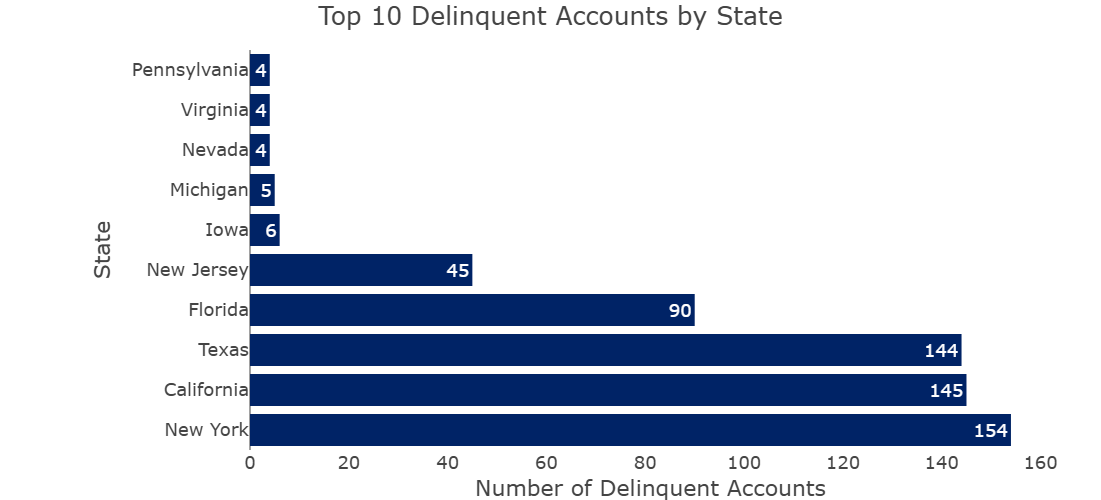

In [105]:
num = 10
delinq_by_states =  delinq_by_state.head(num)

fig = px.bar(
    delinq_by_states,
    x='total_delinquent',
    y='state_cd',
    orientation='h',
    title = f'Top {num} Delinquent Accounts by State',
    height=500,
    width=1100,
    color_discrete_sequence=['#002366'],
    text='total_delinquent'
)

fig.update_layout(
    template="presentation",
    xaxis_title='Number of Delinquent Accounts',
    yaxis_title='State',
    margin=dict(l=250, r=50, t=50, b=50),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.update_traces(textposition='inside')
fig.write_image(os.path.join(results_dir, 'Delinquent_Accounts_by_State.jpg'))
fig.write_image(os.path.join(results_dir, 'Delinquent_Accounts_by_State.png'))
fig.write_html(os.path.join(results_dir, 'Delinquent_Accounts_by_State.html'))

fig.show()

### Customer Count by Satisfaction Level

In [108]:
funnel_df = merged_df.groupby('Cust_Satisfaction_Score')['Client_Num'].count().reset_index(name='customer_count')
funnel_df = funnel_df.sort_values(by='Cust_Satisfaction_Score', ascending=False)
funnel_df

,Cust_Satisfaction_Score,customer_count
4,5,1976
3,4,2099
2,3,3068
1,2,1792
0,1,1173


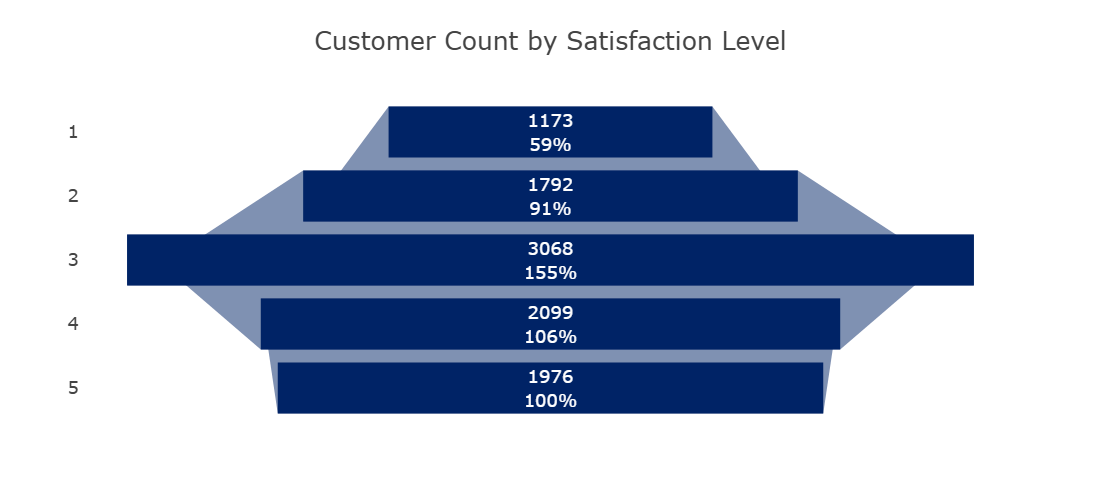

In [110]:
import plotly.graph_objects as go

fig = go.Figure(go.Funnel(
    y = funnel_df['Cust_Satisfaction_Score'].astype(str),
    x = funnel_df['customer_count'],
    textinfo = "value+percent initial",
    marker = {"color": "#002366"}
))

fig.update_layout(
    title="Customer Count by Satisfaction Level",
    template="presentation",
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    height=500,
    width=800
)

fig.write_image(os.path.join(results_dir, 'Customer_Count_by_Satisfaction_Funnel.jpg'))
fig.write_image(os.path.join(results_dir, 'Customer_Count_by_Satisfaction_Funnel.png'))
fig.write_html(os.path.join(results_dir, 'Customer_Count_by_Satisfaction_Funnel.html'))

fig.show()

### Customer Occupation Breakdown

In [113]:
job_df = merged_df.groupby('Customer_Job')['Client_Num'].count().reset_index(name='customer_count')
job_df = job_df.sort_values(by='customer_count', ascending=False)
job_df

,Customer_Job,customer_count
4,selfemployeed,2575
1,businessman,1901
0,blue-collar,1579
5,white-collar,1542
2,govt,1525
3,retirees,986


In [115]:
total_jobs = job_df['customer_count'].sum()
job_df['percentage'] = (job_df['customer_count'] / total_jobs) * 100
job_df

,Customer_Job,customer_count,percentage
4,selfemployeed,2575,25.474871
1,businessman,1901,18.806886
0,blue-collar,1579,15.621290
5,white-collar,1542,15.255243
2,govt,1525,15.087060
3,retirees,986,9.754650


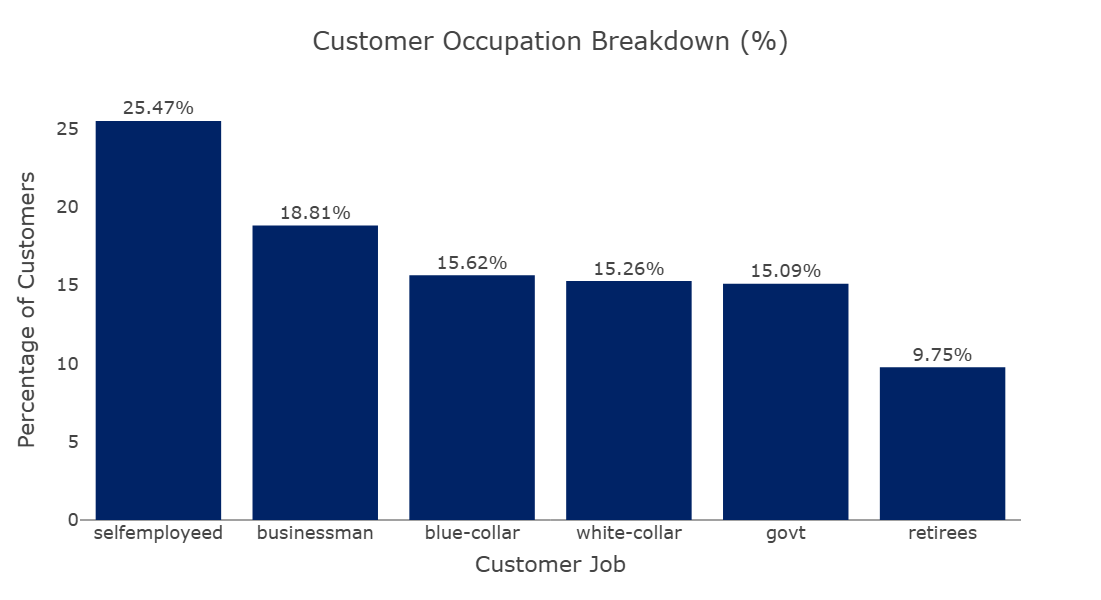

In [117]:
fig = px.bar(
    job_df,
    x='Customer_Job',
    y='percentage',
    title='Customer Occupation Breakdown (%)',
    height=600,
    width=1000,
    color_discrete_sequence=['#002366'],
    text='percentage'
)

fig.update_layout(
    template="presentation",
    xaxis_title="Customer Job",
    yaxis_title="Percentage of Customers",
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.update_traces(
    texttemplate="%{text:.2f}%",
    textposition="outside",
    marker_line_width=0
)

fig.write_image(os.path.join(results_dir, 'Customer_Job_Breakdown.jpg'))
fig.write_image(os.path.join(results_dir, 'Customer_Job_Breakdown.png'))
fig.write_html(os.path.join(results_dir, 'Customer_Job_Breakdown.html'))

fig.show()